In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
dataset = pd.read_csv('train.csv')

In [27]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [29]:
Features = ['GrLivArea','BedroomAbvGr','FullBath','SalePrice']

In [31]:
Data = dataset[Features]

In [33]:
Data

,GrLivArea,BedroomAbvGr,FullBath,SalePrice
0,1710,3,2,208500
1,1262,3,2,181500
2,1786,3,2,223500
3,1717,3,1,140000
4,2198,4,2,250000
...,...,...,...,...
1455,1647,3,2,175000
1456,2073,3,2,210000
1457,2340,4,2,266500
1458,1078,2,1,142125


In [35]:
Data = Data.dropna()

In [37]:
Data

,GrLivArea,BedroomAbvGr,FullBath,SalePrice
0,1710,3,2,208500
1,1262,3,2,181500
2,1786,3,2,223500
3,1717,3,1,140000
4,2198,4,2,250000
...,...,...,...,...
1455,1647,3,2,175000
1456,2073,3,2,210000
1457,2340,4,2,266500
1458,1078,2,1,142125


In [39]:
X = Data[['GrLivArea','BedroomAbvGr','FullBath']]

In [41]:
Y = Data['SalePrice']

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [53]:
Model = LinearRegression()

In [55]:
Model.fit(X_train, Y_train)

LinearRegression()

In [57]:
Y_pred = Model.predict(X_test)

In [59]:
mse = mean_squared_error(Y_test, Y_pred)

In [61]:
r2 = r2_score(Y_test, Y_pred)

In [65]:
print("Model Coefficients : ",Model.coef_)

Model Coefficients :  [   102.07871245 -26637.41968671  31112.29386992]


In [67]:
print("Model Intercept : ",Model.intercept_)

Model Intercept :  52977.04498810574


In [69]:
print("Mean Squared Error : ",mse)

Mean Squared Error :  2575756086.3620534


In [71]:
print("R2 Score : ",r2 )

R2 Score :  0.6308796965755679


In [73]:
new_house = [[20000,15,4]]

In [75]:
predicted_price = Model.predict(new_house)

C:\Users\nikhi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [77]:
print(f"Predicted Price for New House : $ {predicted_price[0]:,.2f}")

Predicted Price for New House : $ 1,819,439.17


In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

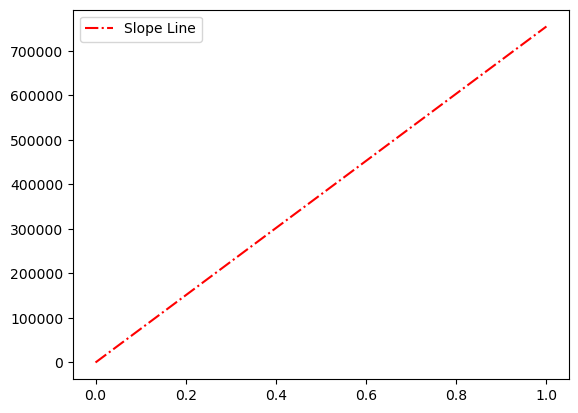

In [88]:
max_price = max(Y_test.max(), Y_pred.max())
plt.plot([0, max_price], color = 'red', linestyle = 'dashdot')
plt.legend(['Slope Line', 'Predictions'])
plt.show()

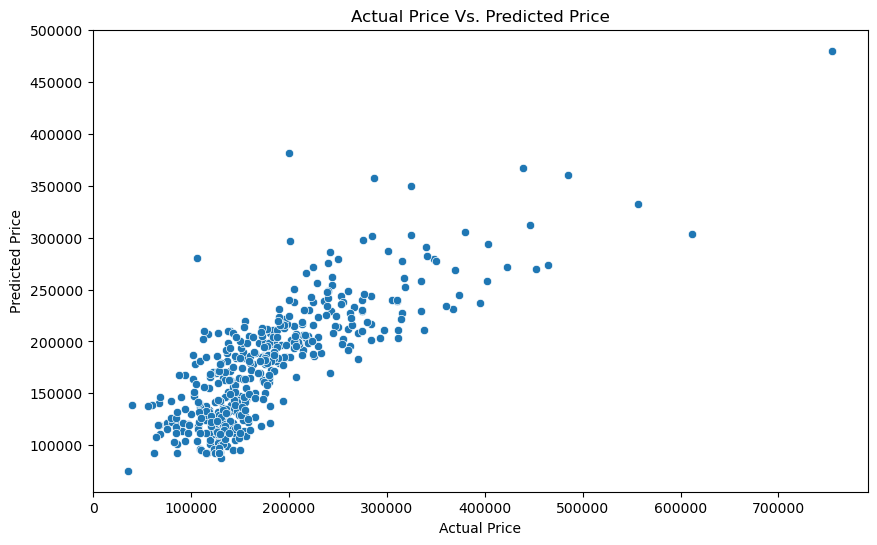

In [90]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = Y_test, y = Y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price Vs. Predicted Price')
plt.show()